In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, t


# Enhancing default style of Matplotlib and Seaborn
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [68]:
data = pd.read_csv(r'data_center\Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')
inspection = data.head().T

inspection

,0,1,2,3,4
Date,9/17/1908,9/7/1909,7/12/1912,8/6/1913,9/9/1913
Time,17:18,NaN,6:30,NaN,18:30
Location,"Fort Myer, Virginia","Juvisy-sur-Orge, France","Atlantic City, New Jersey","Victoria, British Columbia, Canada",Over the North Sea
Operator,Military - U.S. Army,NaN,Military - U.S. Navy,Private,Military - German Navy
Flight #,NaN,NaN,NaN,NaN,NaN
Route,Demonstration,Air show,Test flight,NaN,NaN
AC Type,Wright Flyer III,Wright Byplane,Dirigible,Curtiss seaplane,Zeppelin L-1 (airship)
Registration,NaN,SC1,NaN,NaN,NaN
cn/ln,1,NaN,NaN,NaN,NaN
Aboard,2.0,1.0,5.0,1.0,20.0


In [69]:
#Test Statistics with skimpy 
from skimpy import skim
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4998   │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column                ┃ NA   ┃ NA %                 ┃ mean  ┃ sd    ┃ p0 ┃ p25 ┃ p50 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Aboard                │   18 │  0.36014405762304924 │  31.2 │ 45.53 │  0 │   7 │  16 │  35 │  644 │   ▇    │  │
│ │ Aboard Passangers     │  229 │    4.581832733093237 │ 27.01 │ 44.11 │  0 │   3 │  12 │  30 │  614 │   ▇    │  │
│ │ Aboard Crew           │  226 │   4.5218087234893956 │ 4.479 │ 3.484 │  0 │   2 │   4 │   6 │   61 │   ▇    │  │
│ │ Fatalities            │    8 │   0.1600640256102441 │ 22.37 │ 35.06 │  0 │   4 │  11 │  25 │  583 │   ▇    │  │
│ │ Fatalities Passangers │  242 │    4.841936774709884 │ 19.05 │ 34.15 │  0 │   1 │   8 │  21 │  560 │   ▇    │  │
│ │ Fatalities Crew       │  241 │    4.821928771508603 │ 3.579 │ 3.168 │  0 │   2 │   3 │   5 │   46 │   ▇▁   │  │
│ │ Ground                │   42 │   0.8403361344537815 │ 1.719 │ 55.54 │  0 │   0 │   0 │   0 │ 2750 │   ▇    │  │
│ └───────────────────────┴──────┴──────────────────────┴───────┴───────┴────┴─────┴─────┴─────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Date     │    0 │        0 │ 9/7/1909 │ 10/17/191 │ 1/1/1955 │ 9/9/2005  │     8.98 │         1 │     4998 │  │
│ │          │      │          │          │ 3         │          │           │          │           │          │  │
│ │ Time     │ 1512 │ 30.25210 │ 6:30     │ 91:05:00  │ 0:00     │ 9:57      │     4.69 │       0.7 │     3486 │  │
│ │          │      │ 08403361 │          │           │          │           │          │           │          │  │
│ │          │      │       34 │          │           │          │           │          │           │          │  │
│ │ Location │    4 │ 0.080032 │ Andes    │ Djibouti  │          │ near      │     20.8 │       2.9 │    14724 │  │
│ │          │      │ 01280512 │          │ City,     │ Batagay, │ Craigavad │          │           │          │  │
│ │          │      │      205 │          │ Djibouti  │  Russia  │ ,         │          │           │          │  │
│ │          │      │          │          │ Djibouti  │          │ Northern  │          │           │          │  │
│ │          │      │          │          │ City,     │ 

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [71]:
data.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [72]:
len(data)

4998

In [73]:
#On va drop le #Flight qui représente le numéro de vol, le temps de vol n'est pas pertinent

data = data.drop(columns=['Time', 'Flight #', 'Registration', 'cn/ln'])

In [74]:
#data.head().T
print(data.duplicated().sum())

0


In [75]:
#Les informations Nan d'Operator par Private
data['Operator'] = data['Operator'].fillna('Private')

In [76]:
# Pour la location Unknown, Route et AC type = Unknown
data['Location'] = data['Location'].fillna('Unknown')
data['Route'] = data['Route'].fillna('Unknown')
data['AC Type'] = data['AC Type'].fillna('Unknown')

In [ ]:
# Imputing missing values based on data distribution, data type, and relevance
# For numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
# For categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Converting relevant columns to appropriate data types
# Example: data['column_name'] = pd.to_numeric(data['column_name'], errors='coerce')

In [78]:
#traitement des données terminé
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Location               4998 non-null   object 
 2   Operator               4998 non-null   object 
 3   Route                  4998 non-null   object 
 4   AC Type                4998 non-null   object 
 5   Aboard                 4998 non-null   float64
 6   Aboard Passangers      4998 non-null   float64
 7   Aboard Crew            4998 non-null   float64
 8   Fatalities             4998 non-null   float64
 9   Fatalities Passangers  4998 non-null   float64
 10  Fatalities Crew        4998 non-null   float64
 11  Ground                 4998 non-null   float64
 12  Summary                4998 non-null   object 
dtypes: float64(7), object(6)
memory usage: 507.7+ KB


In [79]:
#Modification de date et ajout de year
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

In [80]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,1908-09-17 00:00:00,1909-09-07 00:00:00,1912-07-12 00:00:00,1913-08-06 00:00:00,1913-09-09 00:00:00,1913-10-17 00:00:00,1915-03-05 00:00:00,1915-09-03 00:00:00,1916-07-28 00:00:00,1916-09-24 00:00:00
Location,"Fort Myer, Virginia","Juvisy-sur-Orge, France","Atlantic City, New Jersey","Victoria, British Columbia, Canada",Over the North Sea,"Near Johannisthal, Germany","Tienen, Belgium","Off Cuxhaven, Germany","Near Jambol, Bulgeria","Billericay, England"
Operator,Military - U.S. Army,Private,Military - U.S. Navy,Private,Military - German Navy,Military - German Navy,Military - German Navy,Military - German Navy,Military - German Army,Military - German Navy
Route,Demonstration,Air show,Test flight,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
AC Type,Wright Flyer III,Wright Byplane,Dirigible,Curtiss seaplane,Zeppelin L-1 (airship),Zeppelin L-2 (airship),Zeppelin L-8 (airship),Zeppelin L-10 (airship),Schutte-Lanz S-L-10 (airship),Zeppelin L-32 (airship)
Aboard,2.0,1.0,5.0,1.0,20.0,30.0,41.0,19.0,20.0,22.0
Aboard Passangers,1.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0
Aboard Crew,1.0,1.0,5.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0
Fatalities,1.0,1.0,5.0,1.0,14.0,30.0,21.0,19.0,20.0,22.0
Fatalities Passangers,1.0,0.0,0.0,0.0,8.0,8.0,8.0,8.0,8.0,8.0


In [81]:
# Nombre total d'accidents
total_crashes = len(data)

# Total de personnes à bord et morts
total_aboard = data['Aboard'].sum()
total_fatalities = data['Fatalities'].sum()
survival_rate = 100 * (total_aboard - total_fatalities) / total_aboard

print(f"Total crashes: {total_crashes}")
print(f"Total aboard: {total_aboard}")
print(f"Total fatalities: {total_fatalities}")
print(f"Survival rate: {survival_rate:.2f}%")

# Crashes par année
crashes_by_year = data.groupby('Year').size()

#Proportion de mort vs sans mort
data['FatalCrash'] = data['Fatalities'].apply(lambda x: 1 if x > 0 else 0)

Total crashes: 4998
Total aboard: 155644.0
Total fatalities: 111732.0
Survival rate: 28.21%


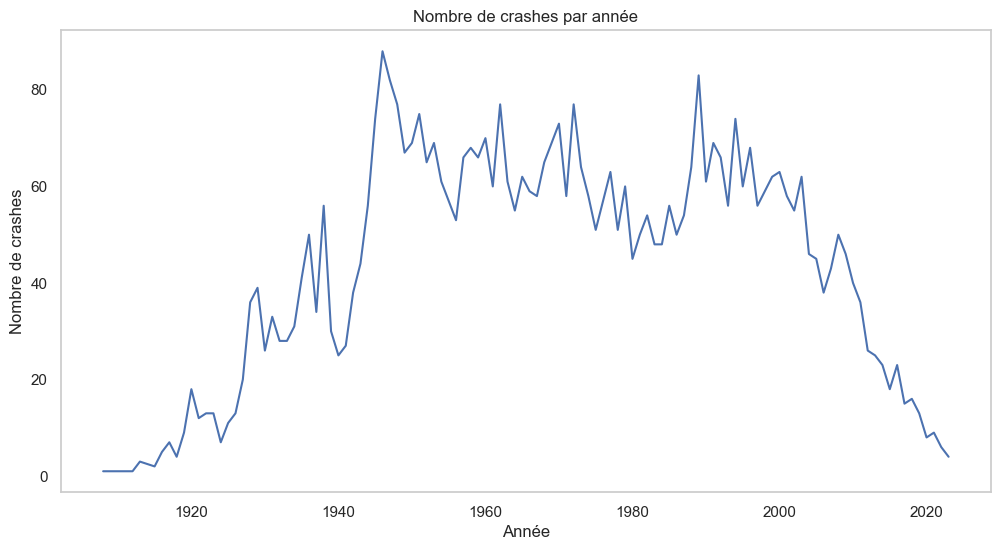

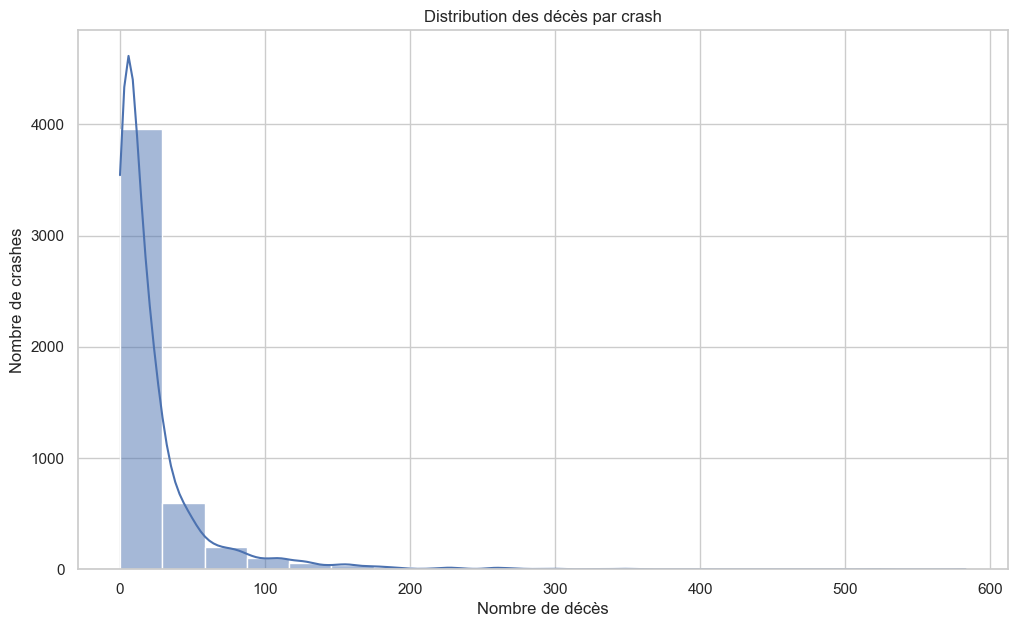

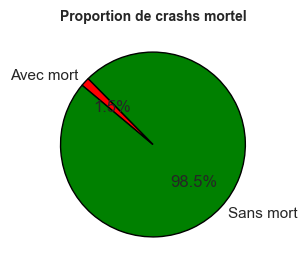

C:\Users\alexa\AppData\Local\Temp\ipykernel_19904\948442419.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ops.values, y=top_ops.index, palette="mako")


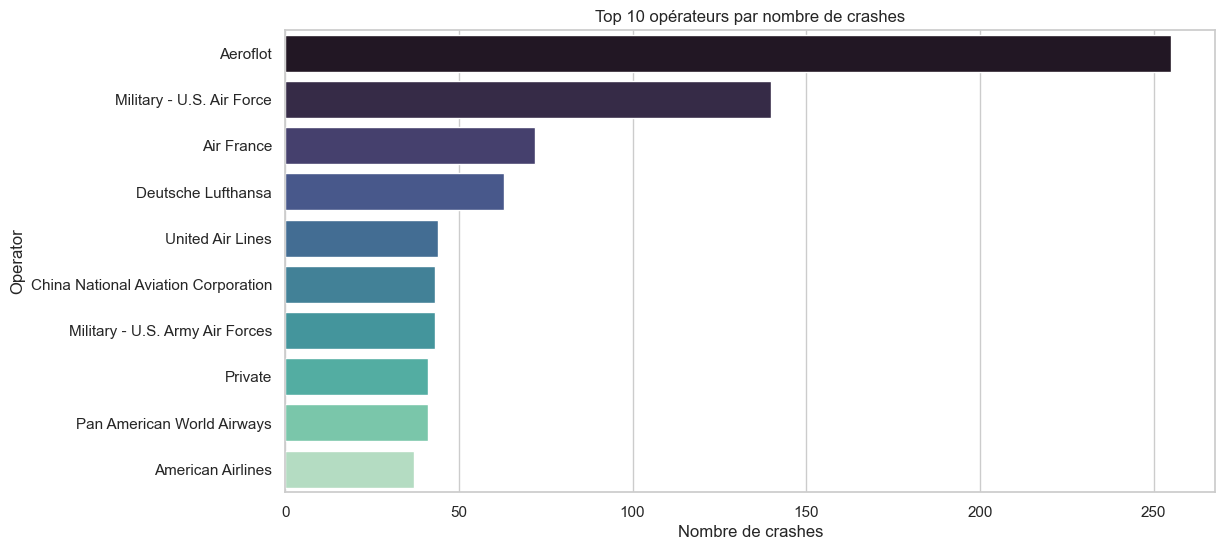

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=crashes_by_year.index, y=crashes_by_year.values)
plt.title("Nombre de crashes par année")
plt.xlabel("Année")
plt.ylabel("Nombre de crashes")
plt.grid()
plt.show()

plt.figure(figsize=(12, 7))
sns.histplot(data['Fatalities'], bins=20, kde=True)
plt.title("Distribution des décès par crash")
plt.xlabel("Nombre de décès")
plt.ylabel("Nombre de crashes")
plt.show()

fatal_counts = data['FatalCrash'].value_counts()

# Labels clairs
labels = ['Sans mort', 'Avec mort']

# Couleurs personnalisées
colors = ['green', 'red']

plt.figure(figsize=(3, 3))
plt.pie(
    fatal_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Proportion de crashs mortel", fontsize=10, fontweight='bold')
plt.show()

plt.figure(figsize=(12, 6))
top_ops = data['Operator'].value_counts().head(10)
sns.barplot(x=top_ops.values, y=top_ops.index, palette="mako")
plt.title("Top 10 opérateurs par nombre de crashes")
plt.xlabel("Nombre de crashes")
plt.show()


On remarque que la majorité des crashes se font entre 1950 à 1990


Par contre la grande majorité ne font que peu de mort par crashes verification avec un diagramme en camembert

1,5% de crashes mortel

Et ce sont les russes qui remporte la palme des crashes!!


In [84]:
# Statistiques sur les décès
fatalities = data['Fatalities']
mean_fat = stats.tmean(fatalities)
median_fat = np.median(fatalities)
std_fat = stats.tstd(fatalities)

print(f"Mean fatalities: {mean_fat:.2f}")
print(f"Median fatalities: {median_fat}")
print(f"Standard deviation: {std_fat:.2f}")

# Hypothèse : les années  1980 vs  1990
year80 = data[(data['Year'] >= 1980) & (data['Year'] < 1990)]['Fatalities']
year90 = data[(data['Year'] >= 1990) & (data['Year'] < 2000)]['Fatalities']

t_stat, p_val = stats.ttest_ind(year80, year90, equal_var=False)

print(f"T-test between years 1980 and years 1990: T-statistic = {t_stat}, P-value = {p_val}")

Mean fatalities: 22.36
Median fatalities: 11.0
Standard deviation: 35.04
T-test between years 1980 and years 1990: T-statistic = 1.9450713304682148, P-value = 0.052024888946359635


In [85]:
df = len(year80) + len(year90) - 2

alpha = 0.05
critical_value = t.ppf(1 - alpha/2, df)


print("Comparaison des morts: T-statistic =", t_stat, "P-value =", p_val)
print("Critical Value for alpha = 0.05 and df =", df, ":", critical_value)

Comparaison des morts: T-statistic = 1.9450713304682148 P-value = 0.052024888946359635
Critical Value for alpha = 0.05 and df = 1181 : 1.9619747067977582


On observe que le p-value est plus grand que 0.05
Donc on rejette le HO qu'il y a une différence significative entre les 2 décennies (80vs90)

On observe aussi que le T-stat est proche de la valeur critique donc il faudrait peut être un échantillon plus grand

In [87]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

In [88]:
correlation_matrix

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Year,FatalCrash
Aboard,1.000000,0.989446,0.605163,0.740196,0.741175,0.321041,0.020334,0.211854,-0.114309
Aboard Passangers,0.989446,1.000000,0.559700,0.735795,0.748262,0.280010,0.019047,0.212140,-0.114666
Aboard Crew,0.605163,0.559700,1.000000,0.480174,0.434471,0.759890,0.034920,0.108353,-0.053490
Fatalities,0.740196,0.735795,0.480174,1.000000,0.987594,0.574159,0.032359,0.161567,0.078762
Fatalities Passangers,0.741175,0.748262,0.434471,0.987594,1.000000,0.512261,0.030299,0.163474,0.067617
Fatalities Crew,0.321041,0.280010,0.759890,0.574159,0.512261,1.000000,0.044047,0.064310,0.133719
Ground,0.020334,0.019047,0.034920,0.032359,0.030299,0.044047,1.000000,0.027828,-0.008575
Year,0.211854,0.212140,0.108353,0.161567,0.163474,0.064310,0.027828,1.000000,-0.017503
FatalCrash,-0.114309,-0.114666,-0.053490,0.078762,0.067617,0.133719,-0.008575,-0.017503,1.000000


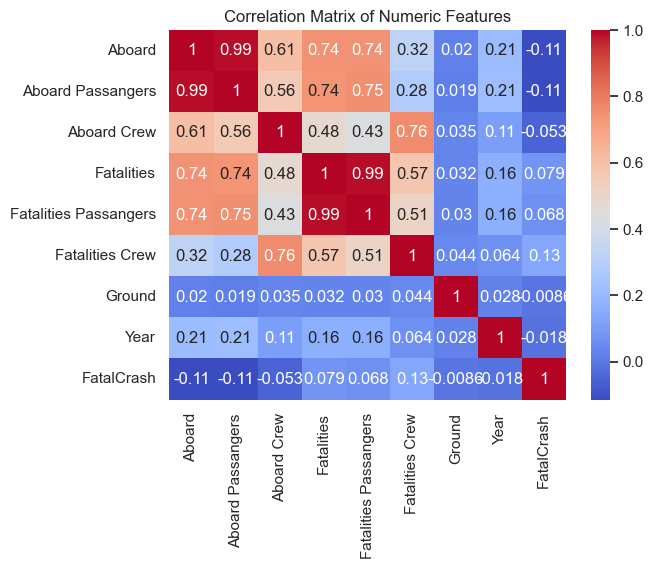

In [89]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

On voit bien les correlations évidentes